True
True


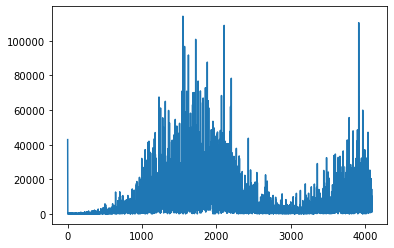

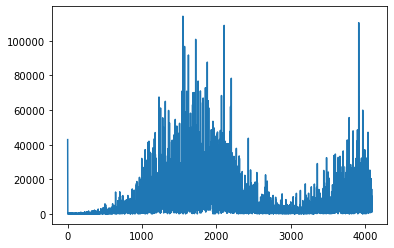

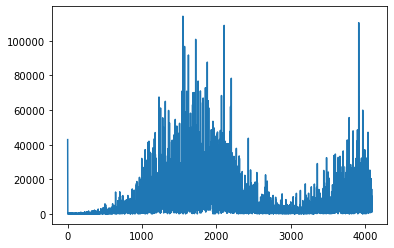

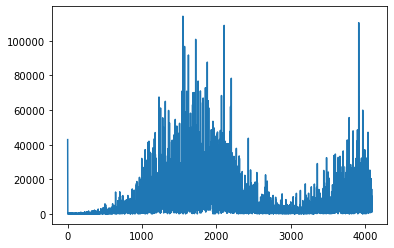

In [5]:
import numpy as np
import scipy.signal
import scipy.fft
import matplotlib.pyplot as plt

N_gen = 8192

# Generate white noise and filter it to give it an interesting PSD
w = np.random.normal(0, 1, (N_gen,))
x = scipy.signal.filtfilt(np.array([1, -2, -3, -4, 5]), np.array([1]), w) + 2

# Find PSD using built-in function and manually:
# Built-in function
f, P = scipy.signal.periodogram(x, 1, 'boxcar', nfft=8192, detrend=False)

# Manually
N = len(x)
X = scipy.fft.fft(x) / np.sqrt(8192) * np.sqrt(2)
X[1:int(N/2)] = X[1:int(N/2)]
P_fft = np.abs(X*np.conj(X))
P_fft_one_sided = P_fft[0:int(N/2)+1]  # P_fft_one_sided is identical to P
P_fft_one_sided[0] = P_fft_one_sided[0] / 2
P_fft_one_sided[-1] = P_fft_one_sided[-1] / 2
print(np.allclose(P, P_fft_one_sided))  # True, P matches P_fft_one_sided

plt.figure(1)
plt.plot(P)

plt.figure(2)
plt.plot(P_fft_one_sided)

# Now undo the manual operation of P_fft_one_sided to get back to a time series, insert your PSD here
N_P = len(P_fft_one_sided)  # Length of PSD
N = 2*(N_P - 1)

# Because P includes both DC and Nyquist (N/2+1), P_fft must have 2*(N_P-1) elements
P_fft_one_sided[0] = P_fft_one_sided[0] * 2
P_fft_one_sided[-1] = P_fft_one_sided[-1] * 2
P_fft_new = np.zeros((N,), dtype=complex)
P_fft_new[0:int(N/2)+1] = P_fft_one_sided
P_fft_new[int(N/2)+1:] = P_fft_one_sided[-2:0:-1]

X_new = np.sqrt(P_fft_new)

# Create random phases for all FFT terms other than DC and Nyquist
phases = np.random.uniform(0, 2*np.pi, (int(N/2),))

# Ensure X_new has complex conjugate symmetry
X_new[1:int(N/2)+1] = X_new[1:int(N/2)+1] * np.exp(2j*phases)
X_new[int(N/2):] = X_new[int(N/2):] * np.exp(-2j*phases[::-1])
X_new = X_new * np.sqrt(8192) / np.sqrt(2)

# This is the new time series with a given PSD
x_new = np.real(scipy.fft.ifft(X_new))

# Verify that P matches P_new
f_new, P_new = scipy.signal.periodogram(x_new, 1, 'boxcar', nfft=8192, detrend=False)
print(np.allclose(P, P_new))  # True, P matches P_new


plt.figure(3)
plt.plot(P)

plt.figure(4)
plt.plot(P_new)